In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import linear_model as lm
from sklearn.cross_validation import cross_val_score
%matplotlib inline

In [131]:
data = pd.read_csv('data/comments.csv.gz')

In [132]:
data.shape

(177508, 3)

In [133]:
data.is_gum.value_counts()

0.0    90054
1.0    87454
Name: is_gum, dtype: int64

In [134]:
lenghts = np.array([len(m) for m in data.text.values])

In [135]:
lenghts.mean(), np.median(lenghts)

(77.020765261283998, 47.0)

In [136]:
min(lenghts), max(lenghts)

(1, 9947)

In [137]:
sum(lenghts)

13671802

In [138]:
http = [m for m in data.text.values if 'http' in m]

In [139]:
http

['[id99906417|Илья], http://prostitutki-voronezha.info/',
 'Вот, как раз на эту тему http://s02.yapfiles.ru/files/531066/SHkala_masshtabov_Vselennoy_v.2.swf Про масштабы вселенной, админы проигнорили мой пост, видимо про котят интереснее.....',
 'http://www.zakonrf.info/koap/20.1/',
 'http://m.youtube.com/#/watch?feature=youtu.be&v=yfDOcUSLZ6o&desktop_uri=%2Fwatch%3Fv%3DyfDOcUSLZ6o%26feature%3Dyoutu.be\nДоставило, особенно комментарии. Спасители наши',
 'вот группа, созданная племянницей Игоря Рогова, она организовала сбор средств для обустройства его подъезда под нужды колясочника. Почитайте, грустно, что администрация города не может это сделать для олимпийского чемпиона...http://vk.com/pomogitecheloveky',
 '[club33041211|Типичный Воронеж], Админ, отправь в баню этого тролля http://vk.com/id253280668, под каждым постом свою ересь постит.',
 '[id160234155|Руслан], http://atvbtr.ru/ - вот, например',
 'посмотрите тогда вот это видео http://ok.ru/video/5554046259',
 'https://vk.com/asg_

In [140]:
np.argmin(lenghts)

12

In [141]:
data.text[95]

'[id7272432|Римма], Вам показалось)😌'

In [127]:
a = '😌'

In [128]:
a.encode()

b'\xf0\x9f\x98\x8c'

In [143]:
splitted = [[w.lower() for w in t.split()] for t in data.text.values]

In [144]:
splitted[1]

['натянули',
 'москвичей!!!',
 'теперь',
 'можно',
 'и',
 'домой',
 'их',
 'отправить',
 '💪💪💪💪💪']

In [150]:
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(data.text.values)

In [153]:
y = data.is_gum.values

In [151]:
vectorizer.vocabulary_

{'збс': 1665,
 'будут': 684,
 'сравнивать': 4216,
 'человеку': 4862,
 'лучшее': 2159,
 'могла': 2336,
 'плохо': 3110,
 'временем': 964,
 'благодарю': 612,
 'объяснять': 2763,
 'anti': 125,
 'яма': 4992,
 'снизу': 4103,
 'заработать': 1647,
 '23': 39,
 'заведения': 1589,
 'тихо': 4455,
 'любая': 2164,
 'фура': 4728,
 'грамотно': 1157,
 'учился': 4673,
 'пропускают': 3569,
 'id13102748': 175,
 'сладких': 4023,
 'даа': 1176,
 'юмор': 4977,
 'деревне': 1283,
 'жестко': 1535,
 'суда': 4333,
 'однажды': 2781,
 'минуты': 2311,
 'снять': 4114,
 'строго': 4322,
 'хорошая': 4777,
 'мак': 2201,
 'камера': 1863,
 'вел': 768,
 'фу': 4727,
 'беседу': 597,
 'ниче': 2651,
 'ехали': 1491,
 'организации': 2842,
 'помнит': 3289,
 'леса': 2107,
 'начало': 2533,
 'начался': 2535,
 'паруса': 3010,
 'преступления': 3467,
 'вырос': 1043,
 'id58320252': 355,
 'бесит': 598,
 'знаки': 1703,
 'другую': 1408,
 'тема': 4430,
 'livejournal': 424,
 'полезно': 3242,
 'представляю': 3458,
 'собираюсь': 4125,
 'добрые':

In [152]:
lr = lm.LogisticRegression()

In [167]:
np.random.seed(0)

In [170]:
cross_val_score(lr, X, y, cv=2)

array([ 0.50770669,  0.51149244])

In [155]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
lr.coef_.argmin()

315

In [165]:
vectorizer.get_feature_names()[315]

'id351582745'

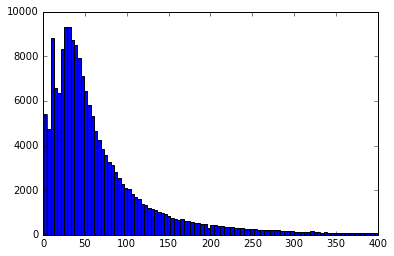

In [129]:
plt.hist(lenghts[lenghts < 400], bins=100);

In [67]:
lenghts[lenghts > 400].shape

(2900,)

In [105]:
data = data[lenghts < 400]

In [106]:
lenghts = np.array([len(m) for m in data.text.values])

In [107]:
lenghts.argmax()

5102

In [108]:
lenghts[5102]

399

In [110]:
data.text.values[5102]

'[id295287808|Ольга], ты вообще знаешь когда такую фразу говорят? Хочешь показаться умной - промолчи.\nЯ тебе объясню..то, что ты написала говорится про покойного после 40 дня смерти. Ты крещённая? Надо бы знать такие вещи, живя в стране, где большая часть населения православные христиане, и я думаю, ты тоже. \nЛишь бы коммент оставить..и ещё и лайкает это кто-то...я в шоке с познаний нашего народа.'